In [1]:
%load_ext autoreload
%autoreload 2

import ncem
import numpy as np
import seaborn as sns

from scipy.stats import ttest_rel, ttest_ind

dir_gs = "/storage/groups/ml01/workspace/anna.schaar/tissue/grid_searches_gen/"
dir_data = "/storage/groups/ml01/workspace/anna.schaar/tissue/data/"

sns.set_palette("colorblind")

## MERFISH - brain

In [3]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG",
        "210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
        "210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_linear.load_gs()

210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation
210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 8 runs with 3-fold cross validation
210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation


subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATI

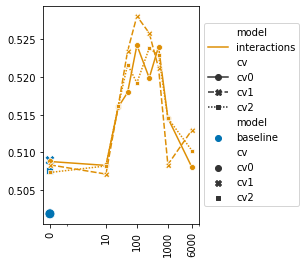

In [4]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_MAX_NODES_PATIENT_1": "interactions",
            "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1": "baseline",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "interactions": "C1"},
    xticks=[0, 10, 100, 1000, 6000],
)

In [5]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=5.600937564995256, pvalue=0.030429565025988266)


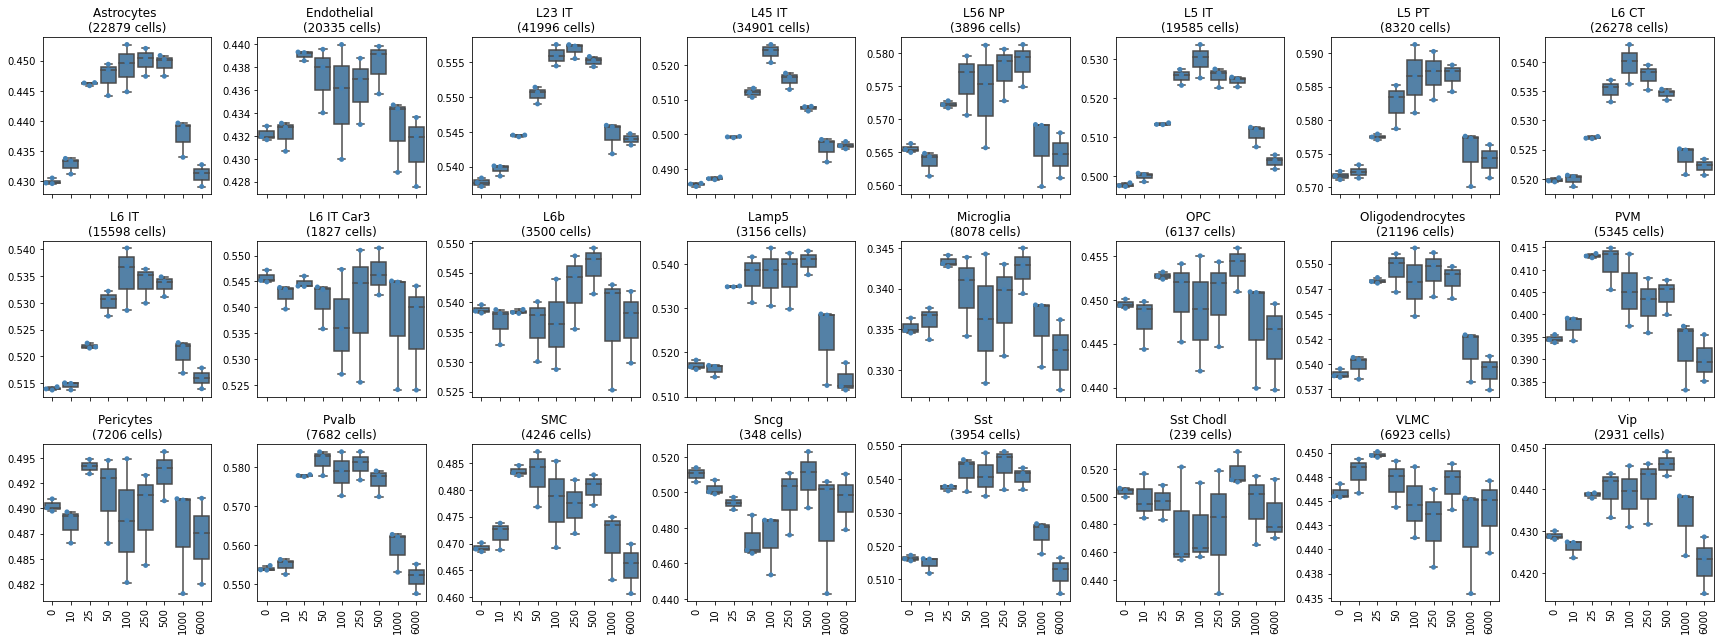

In [5]:
gs_linear.load_target_cell_evaluation()

gs_linear.target_cell_table = gs_linear.target_cell_table[gs_linear.target_cell_table['target_cell'] != 'other']
gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

In [6]:
clm = ncem.interpretation.InterpreterInteraction()
clm.load_model(
    results_path=dir_gs,
    gs_id="210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
    cv_idx=0,
    model_id=test_id_interaction,
    expected_pickle=['history', 'hyperparam', 'evaluation', 'model_args']
)
clm._fn_model_weights
clm.get_data_again(
    data_path=dir_data + "zhang/",
    data_origin="zhang"
)
clm.split_data_byidx_again(cv_idx=0)

clm.init_model_again()
clm.load_weights_again()
clm.cond_type = 'max'

210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 8 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210511_interactions_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecTrue_bs0_md4_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


collecting image-wise celldata


  5%|▍         | 3/64 [00:00<00:02, 22.08it/s]

adding graph-level covariates


100%|██████████| 64/64 [00:03<00:00, 18.80it/s]


Loaded 64 images with complete data from 2 patients over 280327 cells with 254 cell features and 25 distinct celltypes.
Mean of mean node degree per images across images: 40.670611
cross-validation selected: cv0


In [7]:
lm = ncem.interpretation.InterpreterInteraction()
lm.load_model(
    results_path=dir_gs,
    gs_id="210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG",
    cv_idx=0,
    #model_id=test_id_interaction,
    expected_pickle=['history', 'hyperparam', 'evaluation', 'model_args']
)
lm._fn_model_weights
lm.get_data_again(
    data_path=dir_data + "zhang/",
    data_origin="zhang"
)
lm.split_data_byidx_again(cv_idx=0)

lm.init_model_again()
lm.load_weights_again()
lm.cond_type = 'max'

210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210511_interactions_baseline_none_nodes_patient_1_zhang_adam_lr1_agrFalse_predecTrue_bs0_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


collecting image-wise celldata


  8%|▊         | 5/64 [00:00<00:01, 38.92it/s]

adding graph-level covariates


100%|██████████| 64/64 [00:01<00:00, 39.91it/s]


Loaded 64 images with complete data from 2 patients over 280327 cells with 254 cell features and 25 distinct celltypes.
Mean of mean node degree per images across images: 0.000145
cross-validation selected: cv0


In [8]:
clm.reinitialize_model(changed_model_kwargs={'input_shapes': (25, 254, 625, 1, 0, 2)})
lm.reinitialize_model(changed_model_kwargs={'input_shapes': (25, 254, 625, 1, 0, 2)})

setting reinitialized layer weights to layer weights from model 210511_interactions_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecTrue_bs0_md4_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
setting reinitialized layer weights to layer weights from model 210511_interactions_baseline_none_nodes_patient_1_zhang_adam_lr1_agrFalse_predecTrue_bs0_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21


In [9]:
adata_img, adata_L23IT = clm.target_cell_relative_performance(
    image_key='mouse1_slice162',
    baseline_model=lm,
    target_cell_type='L2/3 IT',
    undefined_type='other',
    n_neighbors=40,
    n_pcs=40,
    #clean_view=True
)

  0%|          | 0/6759 [00:00<?, ?it/s]

ATTENTION: specifying reinit_n_eval will change class argument n_eval_nodes_per_graph from 10 to 1


100%|██████████| 6759/6759 [04:08<00:00, 27.16it/s]
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
         Falling back to preprocessing with `sc.pp.pca` and default params.


n cells:  946
L2/3 IT 0    226
L2/3 IT 1    209
L2/3 IT 2    193
L2/3 IT 3    191
L2/3 IT 4    127
Name: L2/3 IT substates, dtype: int64


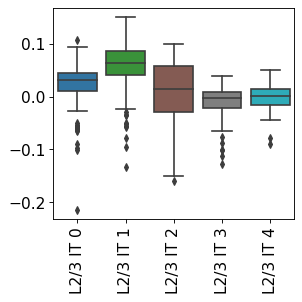

In [10]:
clm.plot_substate_performance(
    adata=adata_L23IT, target_cell_type='L2/3 IT'
)

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


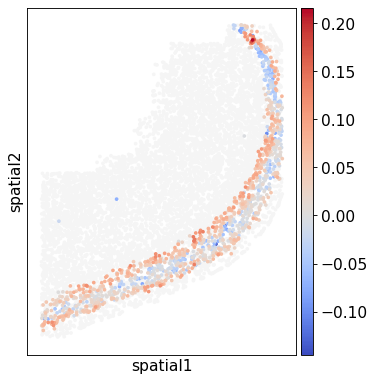

In [11]:
clm.plot_spatial_relative_performance(
    adata=adata_img, target_cell_type='L2/3 IT', figsize=(10,10)
)

## Chip cytometry - colon

In [29]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210414_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_BUSCH",
        "210414_INTERACTIONS_MAX_NODES_PATIENT_1_BUSCH"
    ],
    lateral_resolution = 0.5
)
gs_linear.load_gs()

210414_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_BUSCH: loaded 9 runs with 3-fold cross validation
210414_INTERACTIONS_MAX_NODES_PATIENT_1_BUSCH: loaded 72 runs with 3-fold cross validation


subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATI

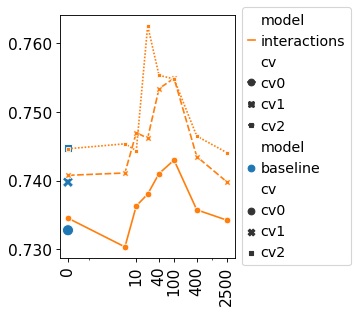

In [30]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_MAX_NODES_PATIENT_1": "interactions",
            "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1": "baseline",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "interactions": "C1"},
    xticks=[ 0,  10, 40, 100, 400, 2500],
)

In [31]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=7.099563973069123, pvalue=0.019268214525060827)


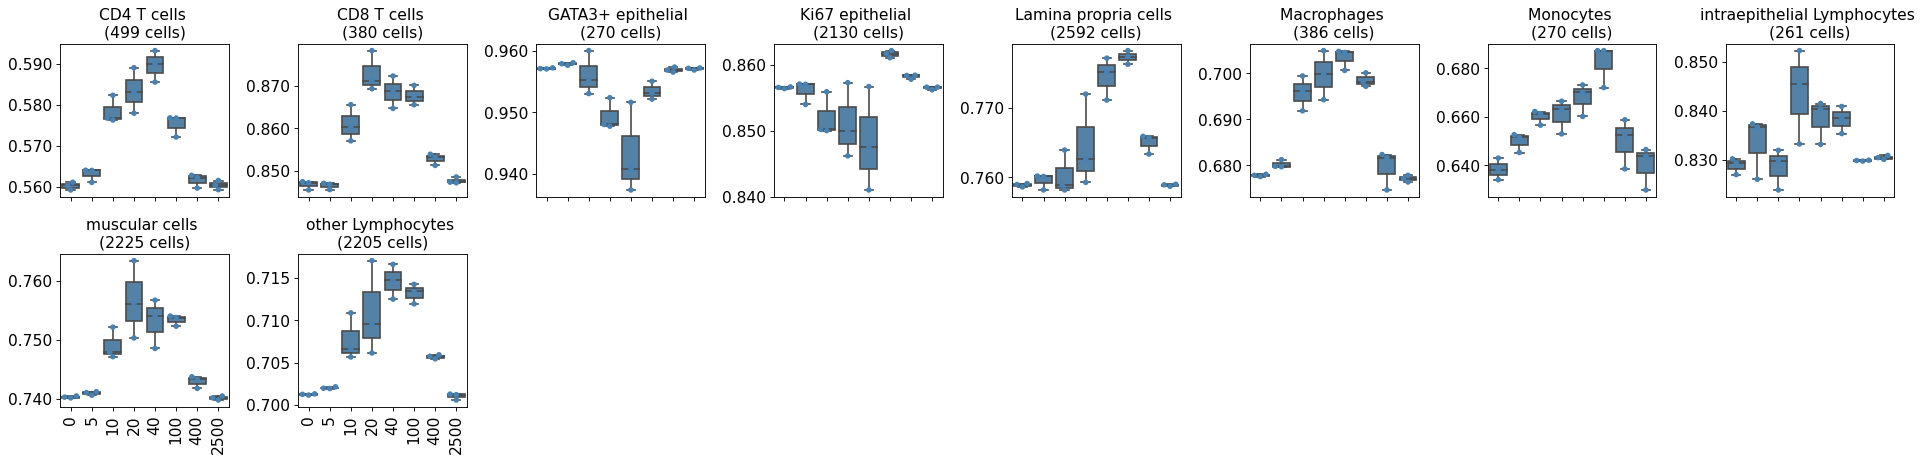

In [15]:
gs_linear.load_target_cell_evaluation()

gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

In [33]:
clm = ncem.interpretation.InterpreterInteraction()
clm.load_model(
    results_path=dir_gs,
    gs_id="210414_INTERACTIONS_MAX_NODES_PATIENT_1_BUSCH",
    cv_idx=0,
    model_id=test_id_interaction,
)
clm._fn_model_weights
clm.get_data_again(
    data_path=dir_data + "busch/",
    data_origin="jarosch"
)
clm.split_data_byidx_again(cv_idx=0)

clm.init_model_again()
clm.load_weights_again()
clm.cond_type = 'max'

210414_INTERACTIONS_MAX_NODES_PATIENT_1_BUSCH: loaded 72 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210414_interactions_max_nodes_patient_1_busch_adam_lr1_agrFalse_bsS_md5_tk4_n100_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l24_l14_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
  0%|          | 0/2 [00:00<?, ?it/s]

collecting image-wise celldata
adding graph-level covariates


100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Loaded 2 images with complete data from 1 patients over 11321 cells with 19 cell features and 12 distinct celltypes.
Mean of mean node degree per images across images: 103.034519
cross-validation selected: cv0

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f7b2f991430> and <tensorflow.python.keras.layers.core.TFOpLambda object at 0x7f7b2f991640>).

Two checkpoint references resolved to different objects (<ncem.models.layers.output_layers.LinearOutput object at 0x7f7b2f9979d0> and <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f7bc0a2c580>).


In [34]:
lm = ncem.interpretation.InterpreterInteraction()
lm.load_model(
    results_path=dir_gs,
    gs_id="210414_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_BUSCH",
    cv_idx=0,
    #model_id=test_id_interaction,
)
lm._fn_model_weights
lm.get_data_again(
    data_path=dir_data + "busch/",
    data_origin="jarosch"
)
lm.split_data_byidx_again(cv_idx=0)

lm.init_model_again()
lm.load_weights_again()
lm.cond_type = 'max'

210414_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_BUSCH: loaded 9 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210414_interactions_baseline_none_nodes_patient_1_busch_adam_lr1_agrFalse_predecTrue_bsS_md0_tk4_n100_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l16_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
  0%|          | 0/2 [00:00<?, ?it/s]

collecting image-wise celldata
adding graph-level covariates


100%|██████████| 2/2 [00:00<00:00, 11.38it/s]


Loaded 2 images with complete data from 1 patients over 11321 cells with 19 cell features and 12 distinct celltypes.
Mean of mean node degree per images across images: 0.000000
cross-validation selected: cv0


In [36]:
clm.reinitialize_model(changed_model_kwargs={'input_shapes': (12, 19, 144, 1, 0, 1)})
lm.reinitialize_model(changed_model_kwargs={'input_shapes': (12, 19, 144, 1, 0, 1)})

setting reinitialized layer weights to layer weights from model 210414_interactions_max_nodes_patient_1_busch_adam_lr1_agrFalse_bsS_md5_tk4_n100_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l24_l14_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
setting reinitialized layer weights to layer weights from model 210414_interactions_baseline_none_nodes_patient_1_busch_adam_lr1_agrFalse_predecTrue_bsS_md0_tk4_n100_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l16_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21


In [41]:
adata_img, adata_CD8Tcells = clm.target_cell_relative_performance(
    image_key='Area_1',
    baseline_model=lm,
    target_cell_type='CD8 T cells',
    n_neighbors=22,
    n_pcs=None,
)

100%|██████████| 4861/4861 [01:37<00:00, 49.62it/s]


n cells:  234
CD8 T cells 0    74
CD8 T cells 1    58
CD8 T cells 2    41
CD8 T cells 3    37
CD8 T cells 4    24
Name: CD8 T cells substates, dtype: int64


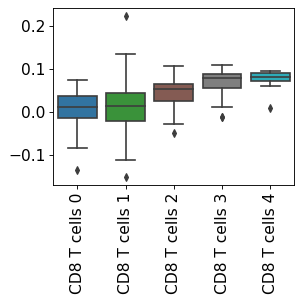

In [42]:
clm.plot_substate_performance(adata=adata_CD8Tcells, target_cell_type='CD8 T cells')

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


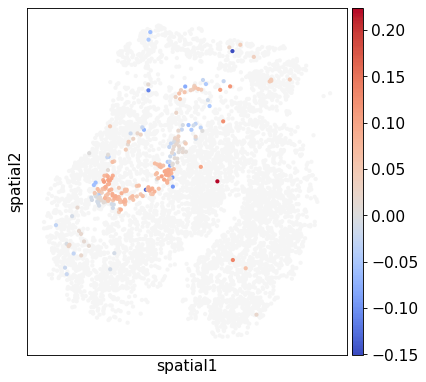

In [39]:
clm.plot_spatial_relative_performance(adata=adata_img, target_cell_type='CD8 T cells')

# MIBI TOF - cancer

In [11]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN",
        "210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution = 400/1024
)
gs_linear.load_gs()

210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN: loaded 1 runs with 3-fold cross validation
210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN: loaded 24 runs with 3-fold cross validation


subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1']


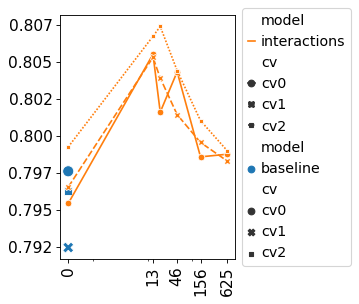

In [12]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1": "baseline",
            "INTERACTIONS_MAX_NODES_IMAGE_1": "interactions",
        })
    ],
    palette = {"baseline": "C0", "interactions": "C1"},
    xticks=[0, 13, 46, 156, 625],
    plot_mode = 'lineplot',
)

In [13]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=7.293874940893317, pvalue=0.01828287301718189)


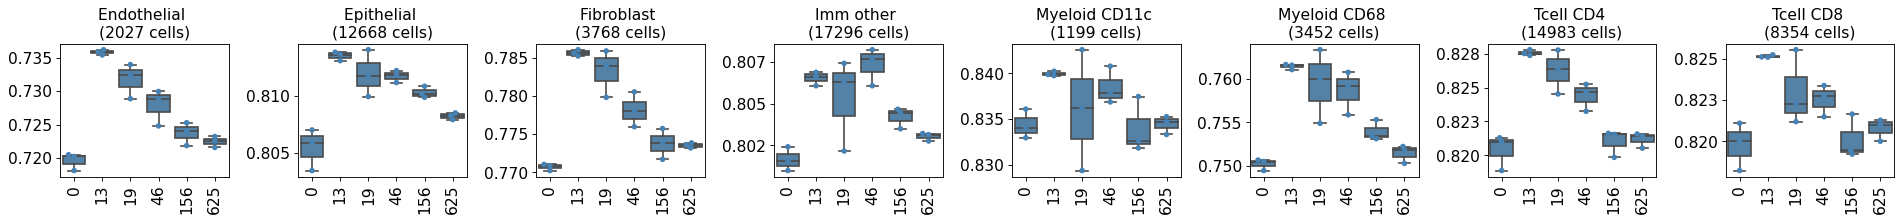

In [19]:
gs_linear.load_target_cell_evaluation()

gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

In [64]:
clm = ncem.interpretation.InterpreterInteraction()
clm.load_model(
    results_path=dir_gs,
    gs_id="210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
    cv_idx=0,
    model_id=test_id_interaction,
)
clm._fn_model_weights
clm.get_data_again(
    data_path=dir_data + "hartmann/",
    data_origin="hartmann"
)
clm.split_data_byidx_again(cv_idx=0)

clm.init_model_again()
clm.load_weights_again()
clm.cond_type = 'max'

210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN: loaded 24 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210419_interactions_max_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md1_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/ic

collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:00<00:00, 130.40it/s]


Loaded 58 images with complete data from 4 patients over 63734 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416425
cross-validation selected: cv0


In [65]:
lm = ncem.interpretation.InterpreterInteraction()
lm.load_model(
    results_path=dir_gs,
    gs_id="210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN",
    cv_idx=0,
    #model_id=test_id_interaction,
)
lm._fn_model_weights
lm.get_data_again(
    data_path=dir_data + "hartmann/",
    data_origin="hartmann"
)
lm.split_data_byidx_again(cv_idx=0)

lm.init_model_again()
lm.load_weights_again()
lm.cond_type = 'max'

210419_INTERACTIONS_BASELINE_NONE_NODES_IMAGE_1_HARTMANN: loaded 1 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210419_interactions_baseline_none_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/ic

collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:00<00:00, 165.11it/s]


Loaded 58 images with complete data from 4 patients over 63734 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 0.000000
cross-validation selected: cv0


In [66]:
lm._model_kwargs

{'input_shapes': (8, 36, 64, 10, 0, 58),
 'l2_coef': 0.0,
 'l1_coef': 0.0,
 'use_interactions': False,
 'use_domain': True,
 'use_node_degree': False,
 'scale_node_size': False,
 'output_layer': 'linear'}

In [67]:
clm.reinitialize_model(changed_model_kwargs={'input_shapes': (8, 36, 64, 1, 0, 58)})
lm.reinitialize_model(changed_model_kwargs={'input_shapes': (8, 36, 64, 1, 0, 58)})

setting reinitialized layer weights to layer weights from model 210419_interactions_max_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md1_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
setting reinitialized layer weights to layer weights from model 210419_interactions_baseline_none_nodes_image_1_hartmann_adam_lr1_agrFalse_predecTrue_bsS_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21


In [68]:
clm.max_nodes = 2268
clm.img_keys_test = [x.replace('scMEP_point_', '') for x in clm.img_keys_test]
clm.nodes_idx_test_new = {}
for key, value in clm.nodes_idx_test.items():
    clm.nodes_idx_test_new.update({key.replace('scMEP_point_', ''): value})
clm.nodes_idx_test = clm.nodes_idx_test_new

clm.img_keys_train = [x.replace('scMEP_point_', '') for x in clm.img_keys_train]
clm.nodes_idx_train_new = {}
for key, value in clm.nodes_idx_train.items():
    clm.nodes_idx_train_new.update({key.replace('scMEP_point_', ''): value})
clm.nodes_idx_train = clm.nodes_idx_train_new

clm.img_keys_eval = [x.replace('scMEP_point_', '') for x in clm.img_keys_eval]
clm.nodes_idx_eval_new = {}
for key, value in clm.nodes_idx_eval.items():
    clm.nodes_idx_eval_new.update({key.replace('scMEP_point_', ''): value})
clm.nodes_idx_eval = clm.nodes_idx_eval_new

In [69]:
lm.max_nodes = 2268
lm.img_keys_test = [x.replace('scMEP_point_', '') for x in lm.img_keys_test]
lm.nodes_idx_test_new = {}
for key, value in lm.nodes_idx_test.items():
    lm.nodes_idx_test_new.update({key.replace('scMEP_point_', ''): value})
lm.nodes_idx_test = lm.nodes_idx_test_new

lm.img_keys_train = [x.replace('scMEP_point_', '') for x in lm.img_keys_train]
lm.nodes_idx_train_new = {}
for key, value in lm.nodes_idx_train.items():
    lm.nodes_idx_train_new.update({key.replace('scMEP_point_', ''): value})
lm.nodes_idx_train = lm.nodes_idx_train_new

lm.img_keys_eval = [x.replace('scMEP_point_', '') for x in lm.img_keys_eval]
lm.nodes_idx_eval_new = {}
for key, value in lm.nodes_idx_eval.items():
    lm.nodes_idx_eval_new.update({key.replace('scMEP_point_', ''): value})
lm.nodes_idx_eval = lm.nodes_idx_eval_new

In [86]:
adata_img, adata_CD8Tcells = clm.target_cell_relative_performance(
    image_key=[1, 5, 8, 16],
    baseline_model=lm,
    target_cell_type='Tcell CD8',
    n_neighbors=60,
    n_pcs=None,
)

100%|█████████▉| 5506/5507 [01:18<00:00, 70.51it/s] 
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.


n cells:  1329
Tcell CD8 0    365
Tcell CD8 1    284
Tcell CD8 2    260
Tcell CD8 3    248
Tcell CD8 4    172
Name: Tcell CD8 substates, dtype: int64


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'donor' as categorical
... storing 'Cluster' as categorical


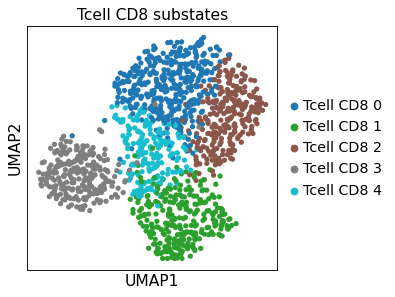

In [87]:
import scanpy as sc
sc.pl.umap(adata_CD8Tcells, color='Tcell CD8 substates', palette='tab10')

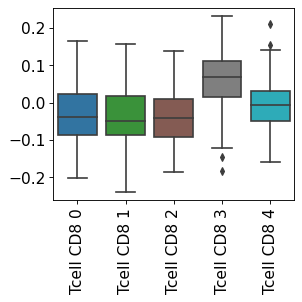

In [81]:
clm.plot_substate_performance(adata=adata_CD8Tcells, target_cell_type='Tcell CD8')

In [85]:
adata_CD8Tcells

AnnData object with n_obs × n_vars = 1329 × 36
    obs: 'point', 'cell_id', 'donor', 'Cluster', 'Cluster_preprocessed', 'relative_r_squared', 'louvain', 'Tcell CD8 substates'
    uns: 'metadata', 'img_keys', 'img_to_patient_dict', 'node_type_names', 'graph_covariates', 'neighbors', 'louvain', 'umap', 'Tcell CD8 substates_colors'
    obsm: 'spatial', 'node_types', 'X_umap'
    obsp: 'distances', 'connectivities'

In [74]:
adata_img

AnnData object with n_obs × n_vars = 1045 × 36
    obs: 'point', 'cell_id', 'donor', 'Cluster', 'Cluster_preprocessed', 'relative_r_squared'
    uns: 'metadata', 'img_keys', 'img_to_patient_dict', 'node_type_names', 'graph_covariates'
    obsm: 'spatial', 'node_types'

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view

Trying to set attribute `.obs` of view, copying.
... storing 'donor' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Cluster' as categorical


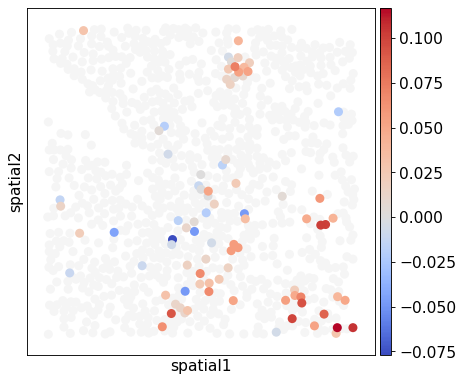

In [75]:
clm.plot_spatial_relative_performance(adata=adata_img, target_cell_type='Tcell CD8', spot_size=30)

# MELC - tonsils data

In [20]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210419_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_pascualreguanttonsil",
        "210419_INTERACTIONS_MAX_NODES_PATIENT_1_pascualreguanttonsil",
    ],
    lateral_resolution = 0.325
)
gs_linear.load_gs()

210419_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_pascualreguanttonsil: loaded 1 runs with 3-fold cross validation
210419_INTERACTIONS_MAX_NODES_PATIENT_1_pascualreguanttonsil: loaded 8 runs with 3-fold cross validation


subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATI

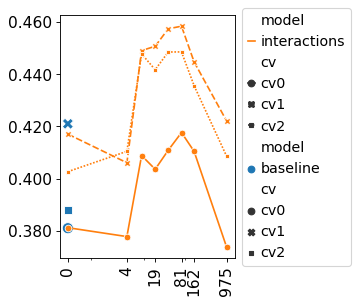

In [21]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1": "baseline",
            "INTERACTIONS_MAX_NODES_PATIENT_1": "interactions",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "interactions": "C1"},
    xticks=[0,4,19,81,162, 975],
)

In [22]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=5.705323722208301, pvalue=0.02937438518356575)


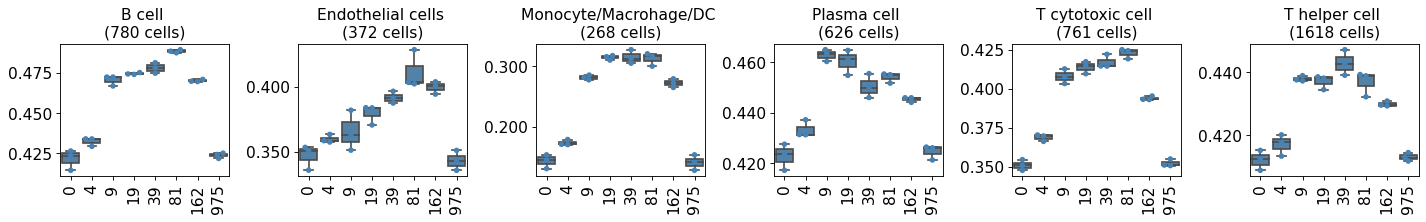

In [23]:
gs_linear.load_target_cell_evaluation()
gs_linear.target_cell_table = gs_linear.target_cell_table[gs_linear.target_cell_table['target_cell'] != 'other']
gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

# CODEX - cancer

In [24]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210422_INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1_SCHUERCH",
        "210422_INTERACTIONS_MAX_NODES_IMAGE_1_SCHUERCH",
    ],
    lateral_resolution = 0.377442
)
gs_linear.load_gs()

210422_INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1_SCHUERCH: loaded 1 runs with 3-fold cross validation
210422_INTERACTIONS_MAX_NODES_IMAGE_1_SCHUERCH: loaded 6 runs with 3-fold cross validation


subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_IMAGE_1'], given was ['INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1']


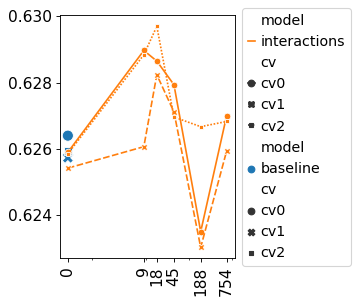

In [25]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1": "baseline",
            "INTERACTIONS_MAX_NODES_IMAGE_1": "interactions",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "interactions": "C1"},
    xticks=[0,9,18,45,188,754],
)

In [26]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_MAX_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=6.047849331719845, pvalue=0.02626752133879902)


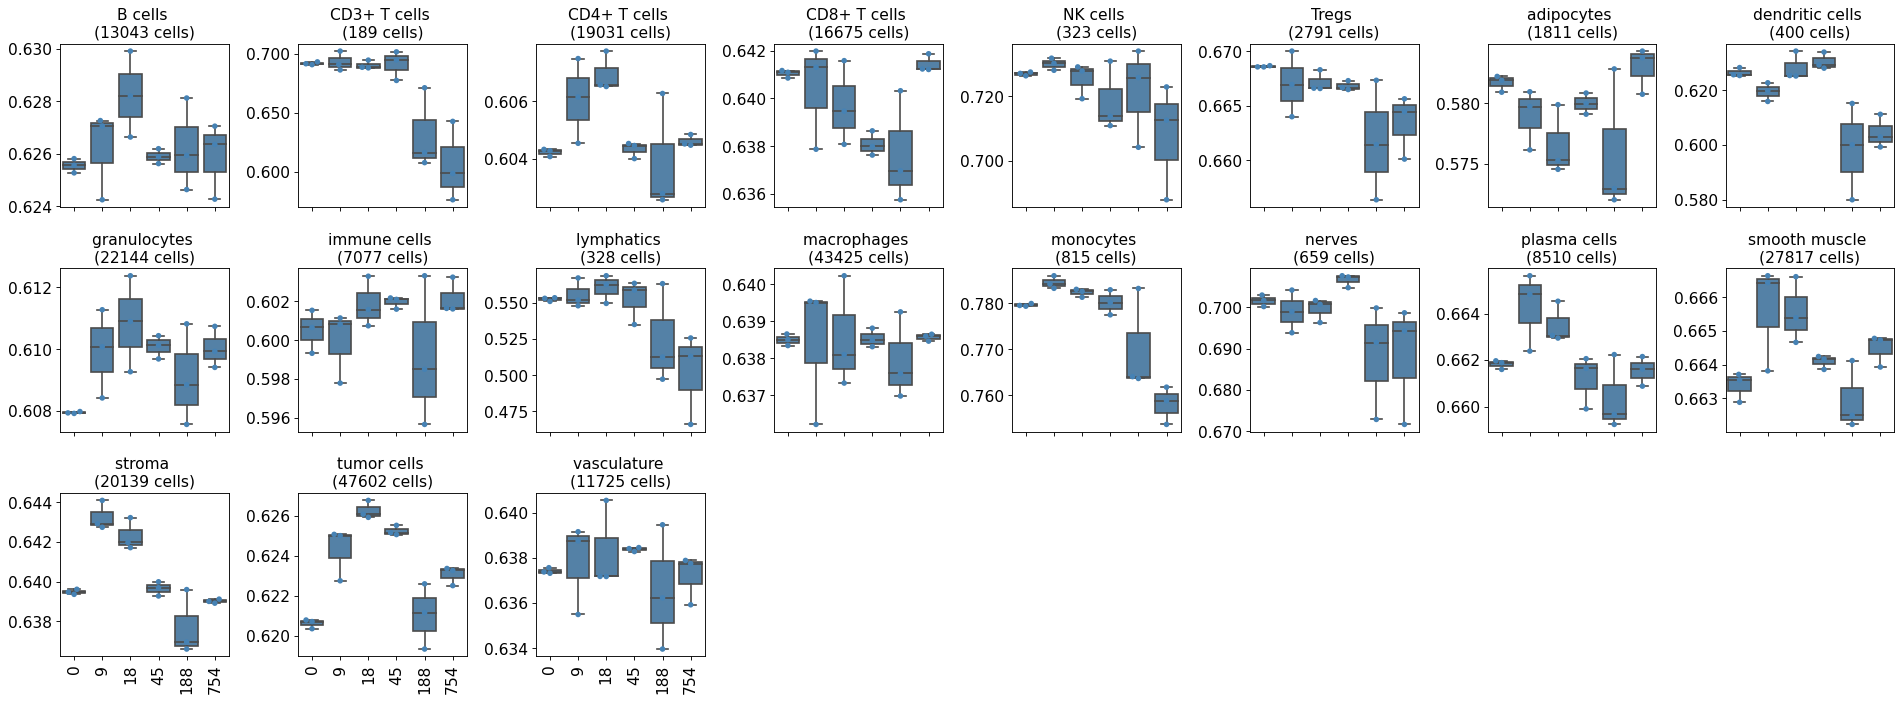

In [27]:
gs_linear.load_target_cell_evaluation()
gs_linear.target_cell_table = gs_linear.target_cell_table[gs_linear.target_cell_table['target_cell'] != 'undefined']
gs_linear.target_cell_table = gs_linear.target_cell_table[gs_linear.target_cell_table['target_cell'] != 'dirt']

gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)